<a href="https://colab.research.google.com/github/jlvsbhumika/Pricing-Landing-Page/blob/main/Dwdm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract**

Parkinson's disease is a progressive central nervous system condition that affects movement and causes tremors and stiffness.

It has 5 stages to it and an estimated seven to 10 million people worldwide have Parkinson’s disease.

This is chronic and still has no cure. It is a neurodegenerative disease that affects the neurons in the brain that contain dopamine.


Details About the Data Set

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals.

The original study published the
feature extraction methods for general voice disorders.

Number of Instances: 195

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A

File Size: 39.7 KB



Attribute Information:

Matrix column entries (attributes):

***name*** - ASCII subject name and recording number

***MDVP:Fo(Hz) ***- Average vocal fundamental frequency

***MDVP:Fhi(Hz)*** - Maximum vocal fundamental frequency

***MDVP:Flo(Hz)*** - Minimum vocal fundamental frequency

***MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP*** - Several measures of variation in fundamental frequency

***MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA*** - Several measures of variation in amplitude

***NHR,HNR ***- Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

***RPDE,D2*** - Two nonlinear dynamical complexity measures

***DFA*** - Signal fractal scaling exponent

***spread1,spread2,PPE*** - Three nonlinear measures of fundamental frequency variation

Please refer to the below link for more details on Computing the fundamental frequency variation spectrum in conversational spoken dialog system.

http://www.cs.cmu.edu/~kornel/pubs/003228.pdf

In [ ]:
# make necessary imports
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install plotly

In [ ]:
from plotly.offline import iplot
import plotly as py

In [ ]:
os.getcwd()

'/content'

In [ ]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',25)
pd.set_option('display.width',200)

In [ ]:
df = pd.read_csv('/content/parkinsons.data')
print(df.corr(numeric_only = True))

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003         -0.382027 -0.076194 -0.112165   -0.076213     -0.098374         -0.073742     -0.094717     -0.070682 -0.077774   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086         -0.029198  0.097177  0.091126    0.097150      0.002281          0.043465     -0.003743     -0.009997  0.004937   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919         -0.277815 -0.100519 -0.095828   -0.100488     -0.144543         -0.119089     -0.150747     -0.101095 -0.107293   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000          0.935714  0.990276  0.974256    0.990276      0.769063          0.804289      0.746625      0.725561  0.758255   
MDVP:Jitter(Abs

In [ ]:
df.shape

(195, 24)

In [ ]:
# find null value
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

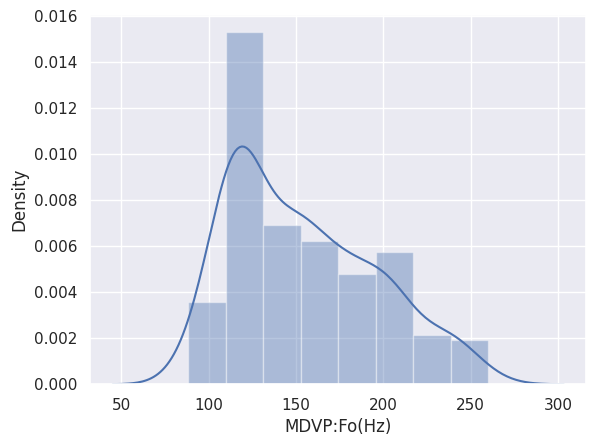

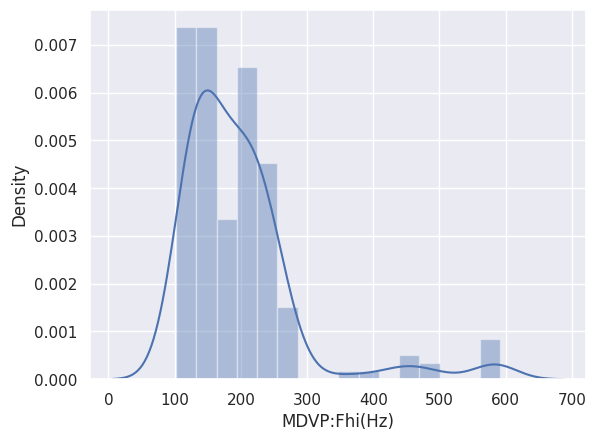

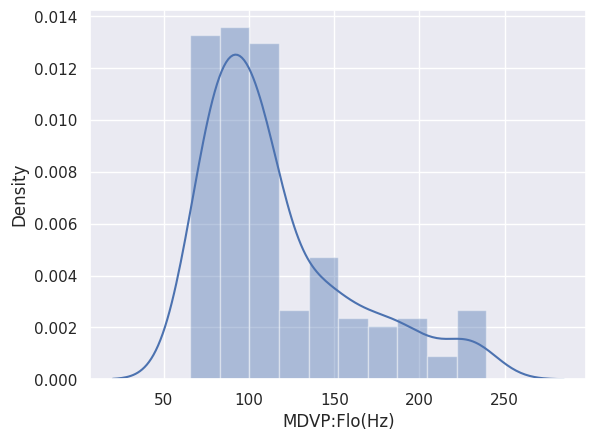

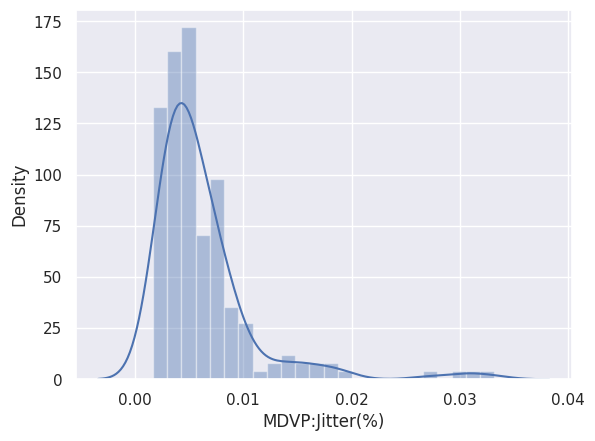

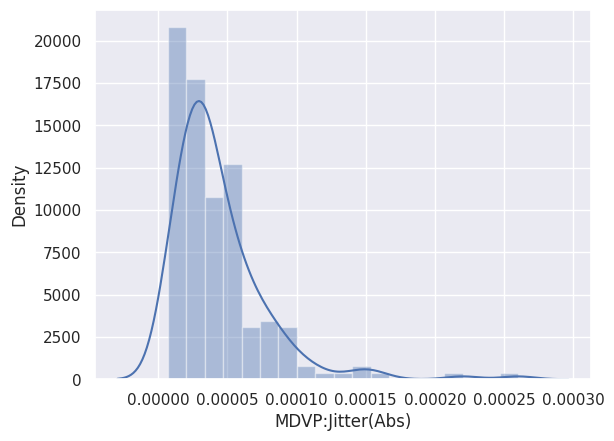

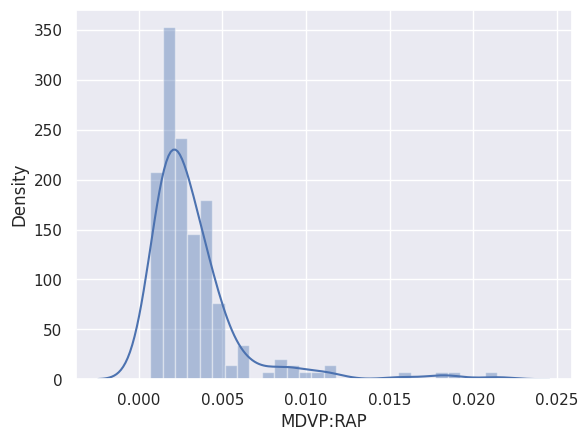

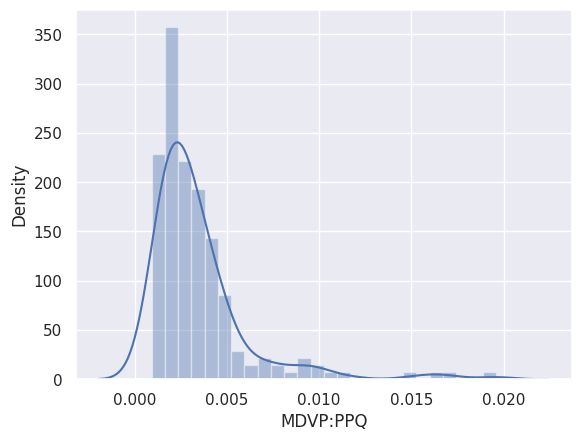

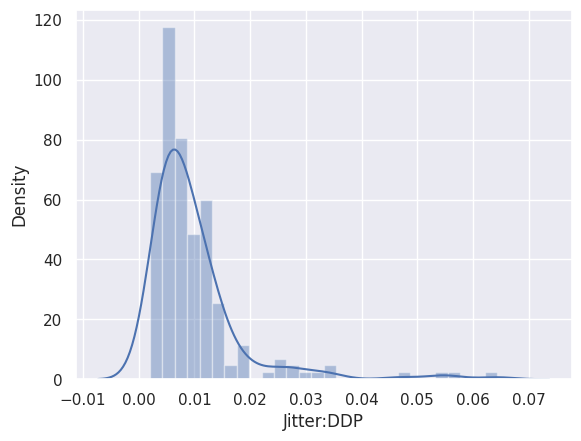

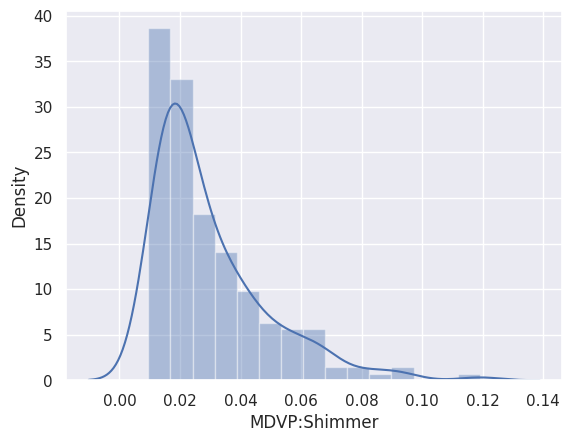

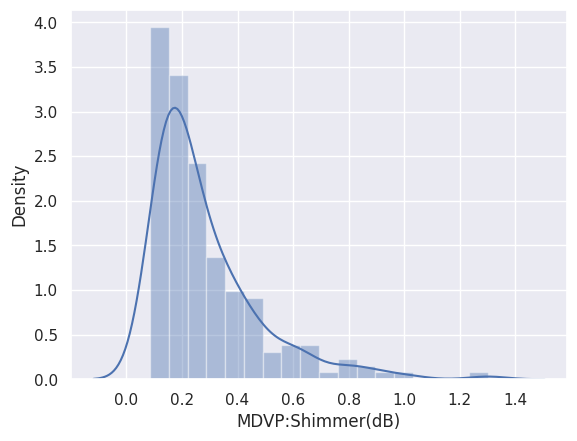

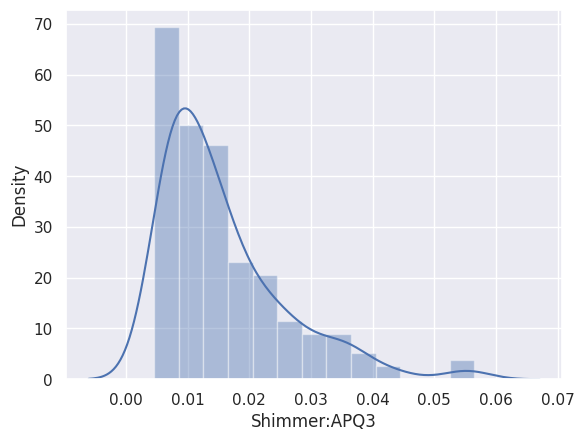

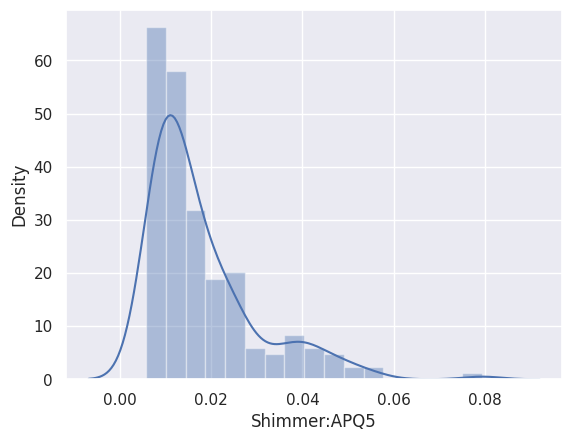

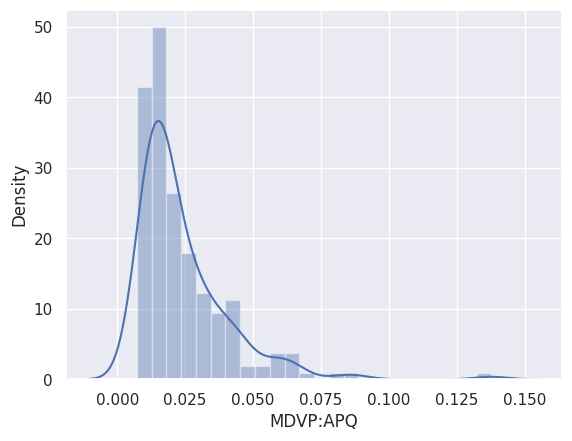

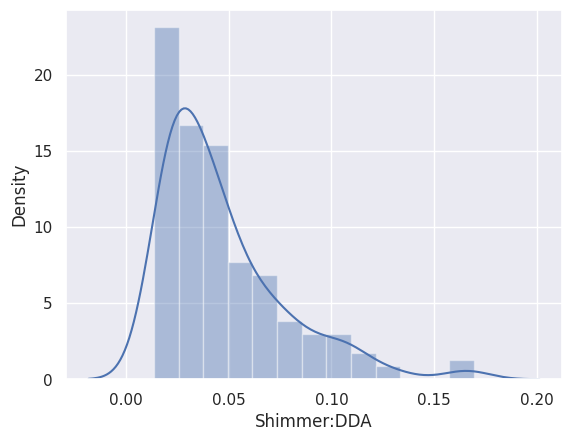

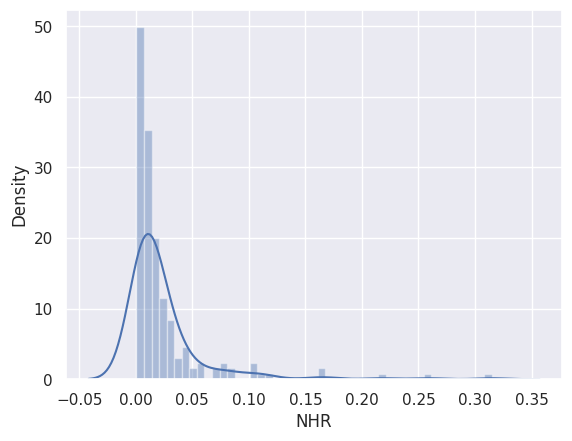

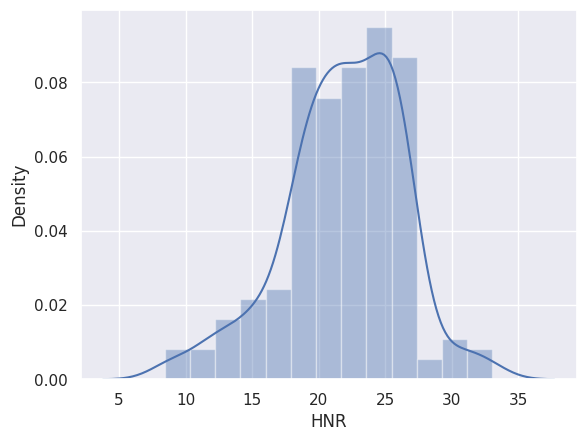

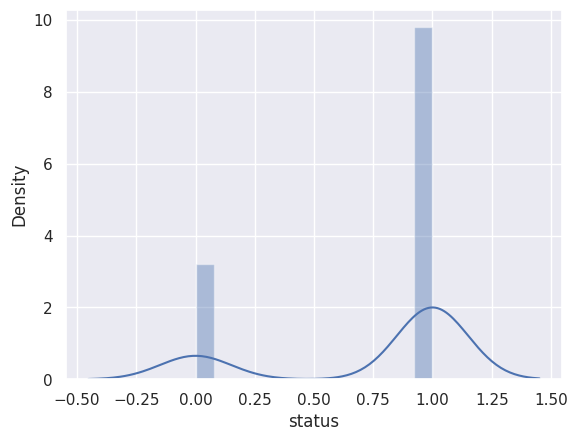

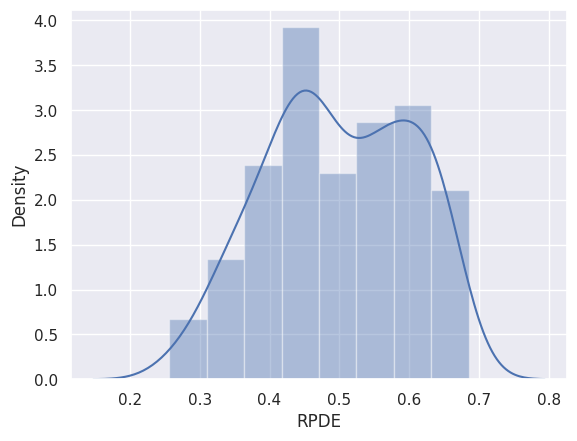

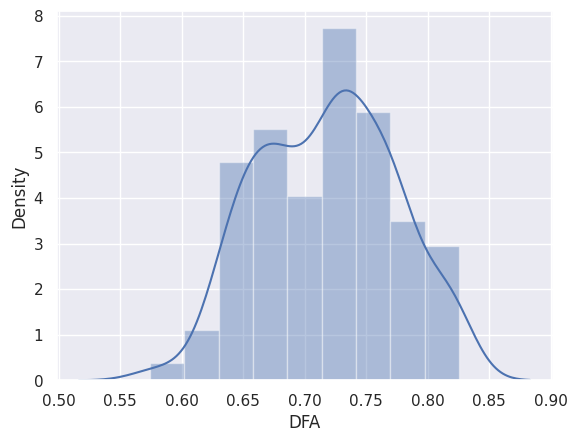

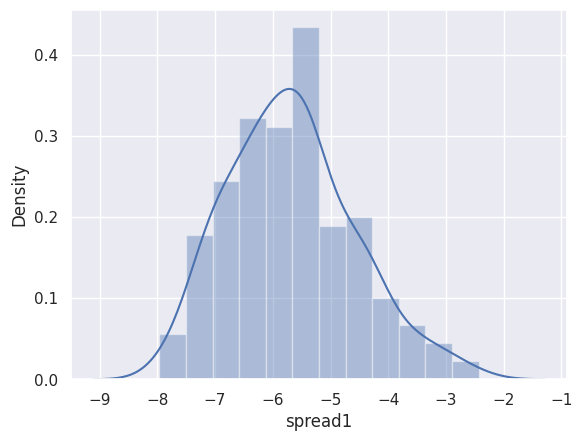

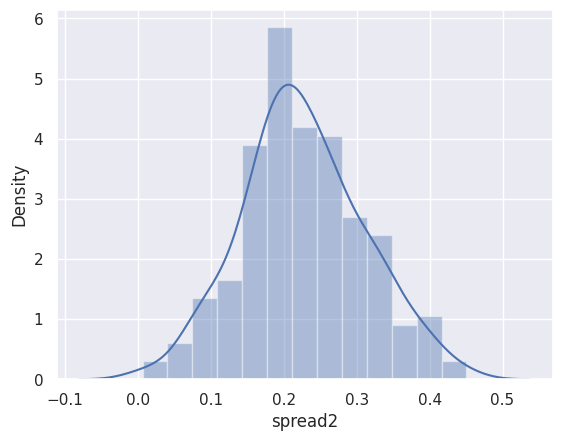

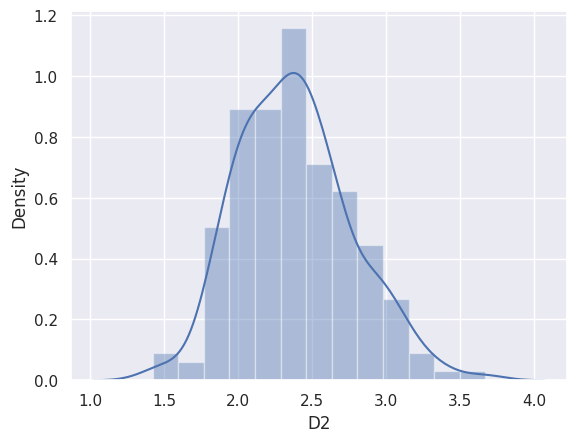

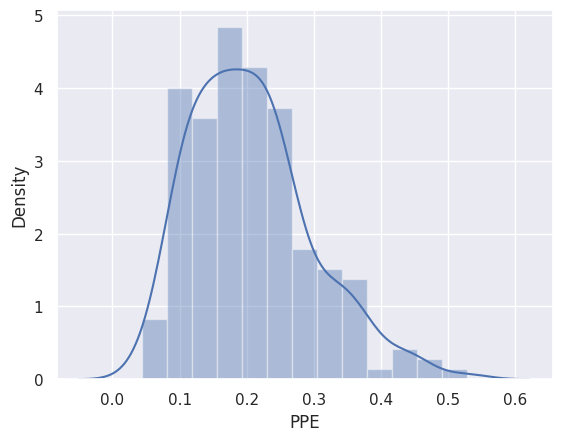

In [ ]:
# find the distribution of the dataset

def distplots(col):
    sns.distplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    distplots(i)

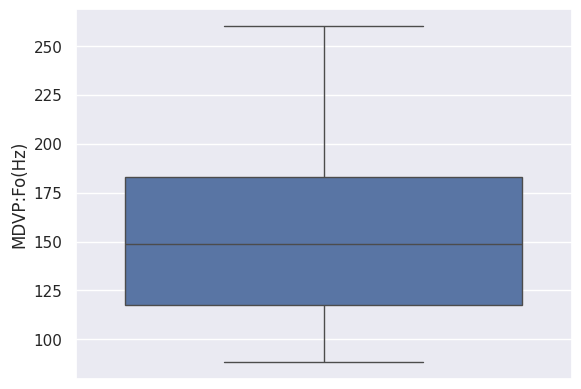

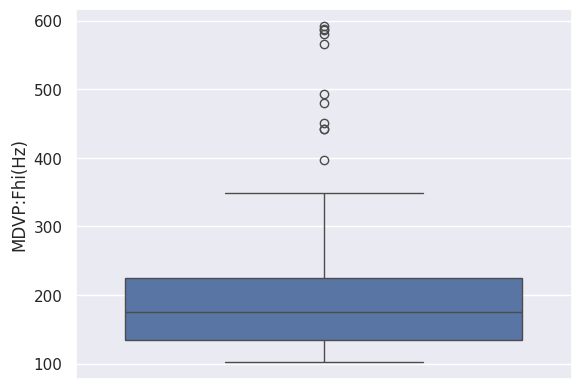

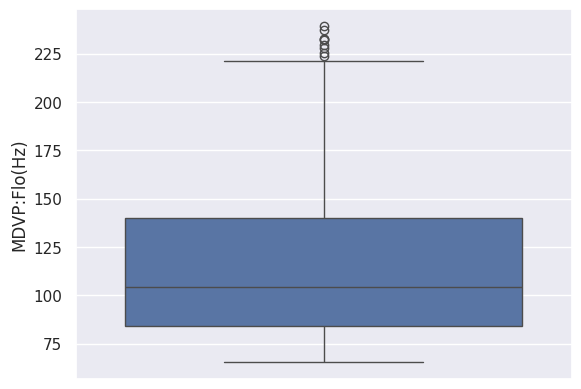

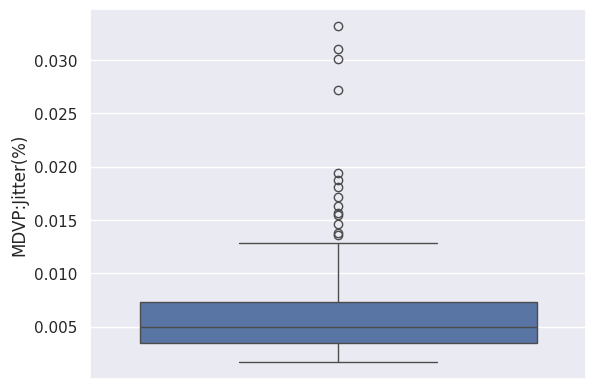

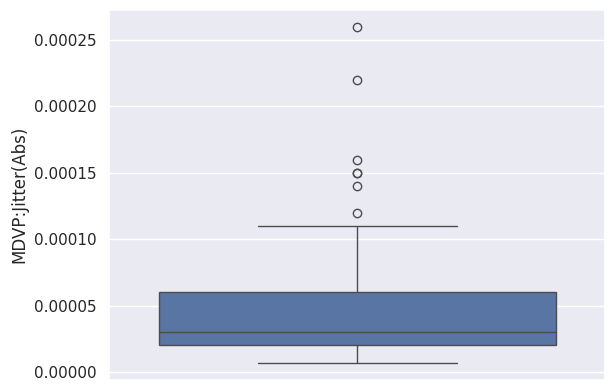

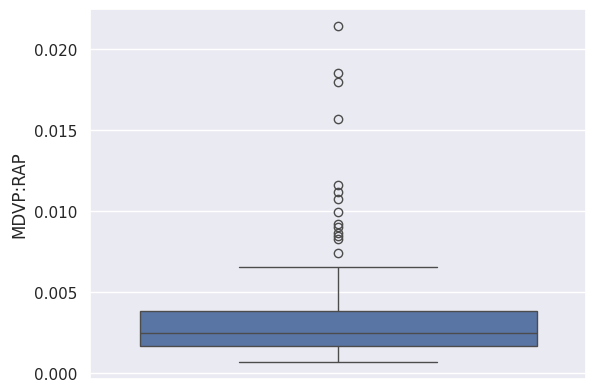

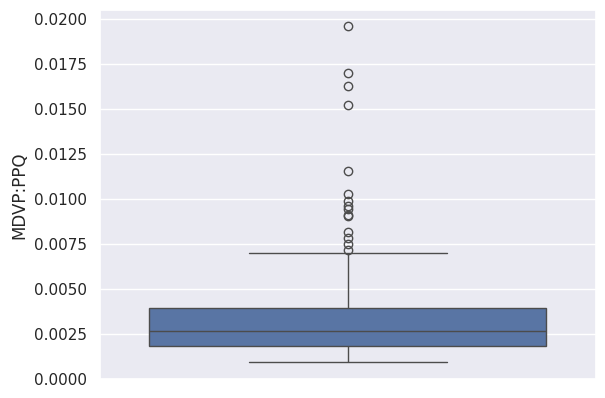

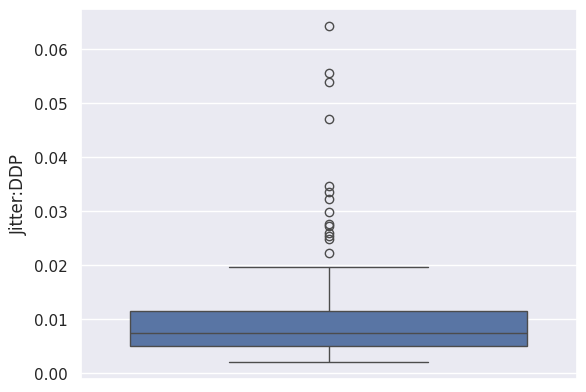

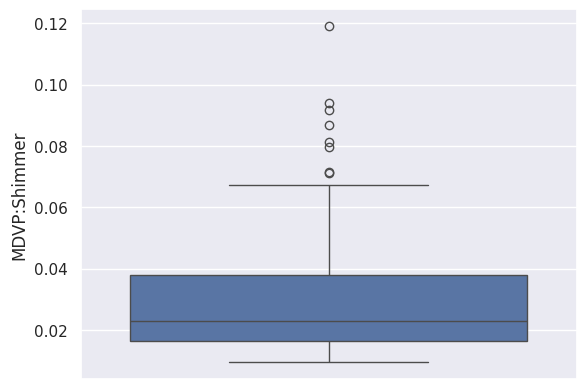

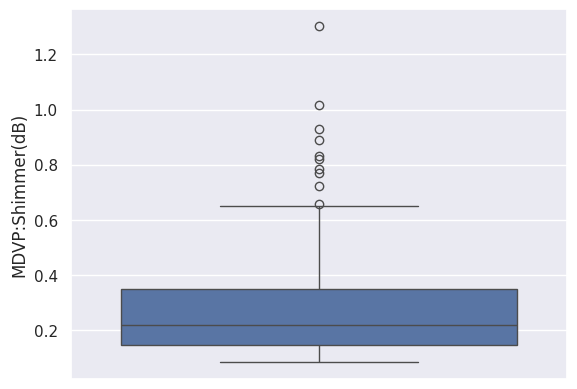

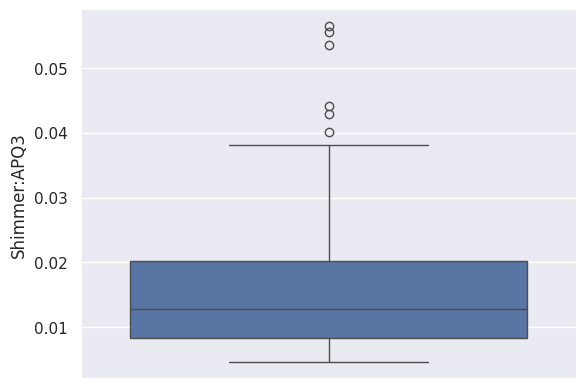

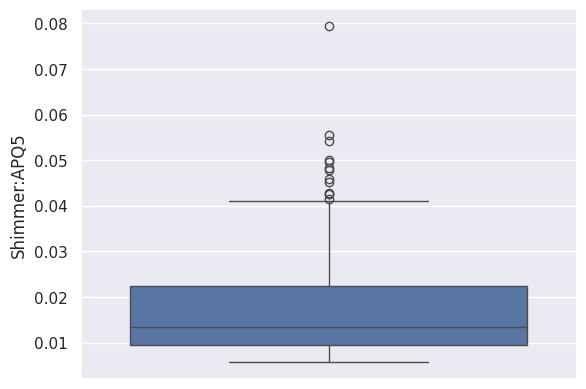

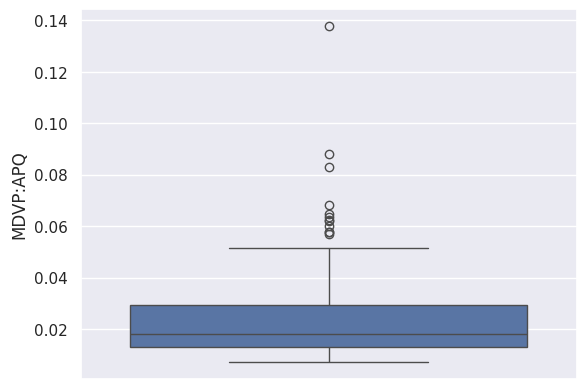

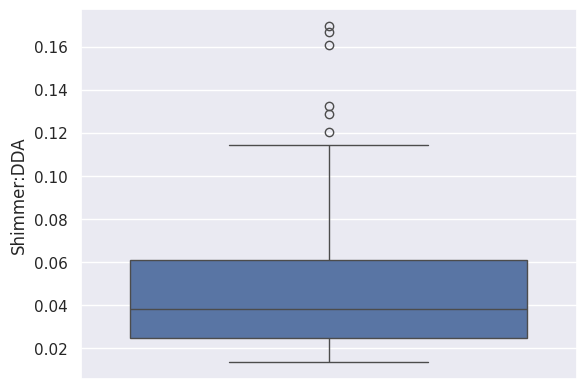

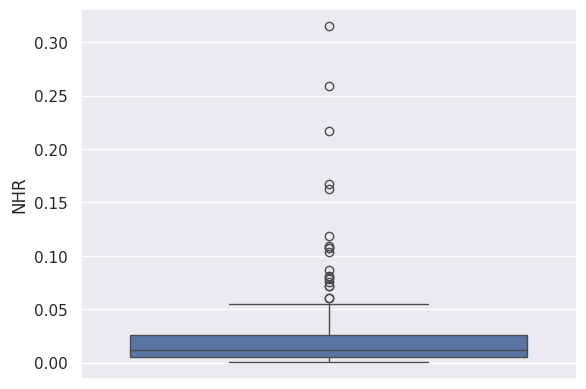

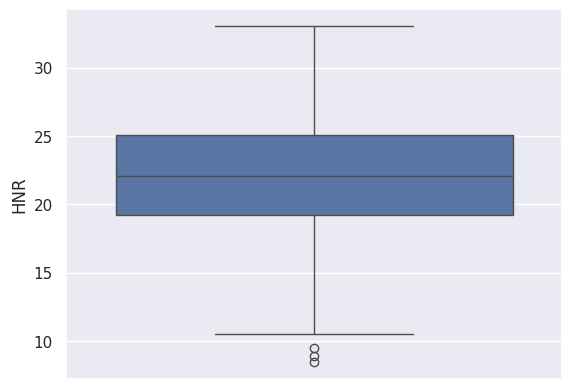

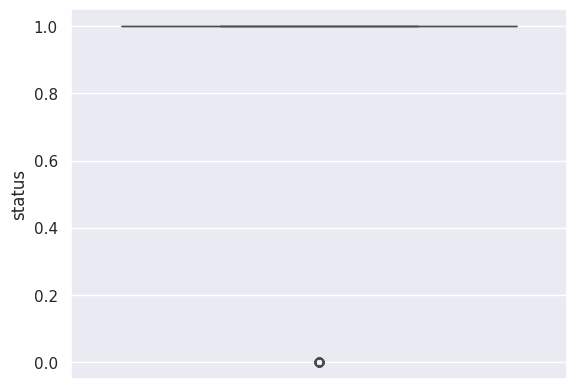

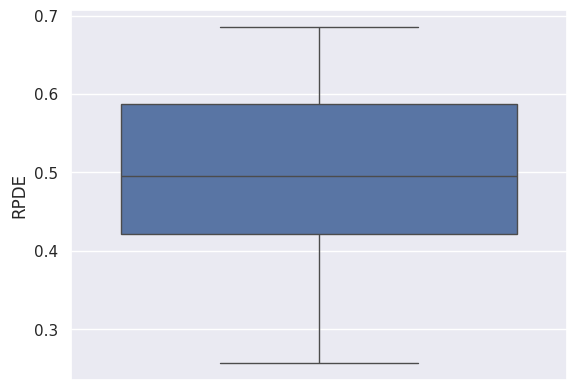

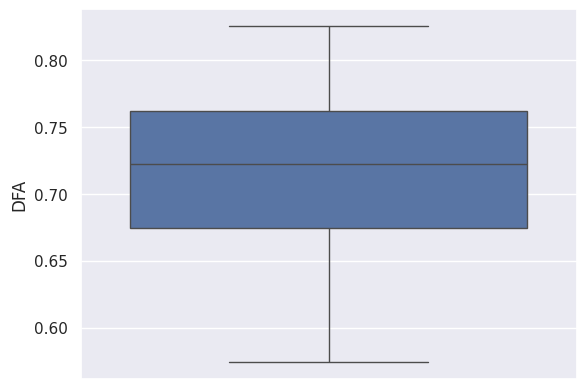

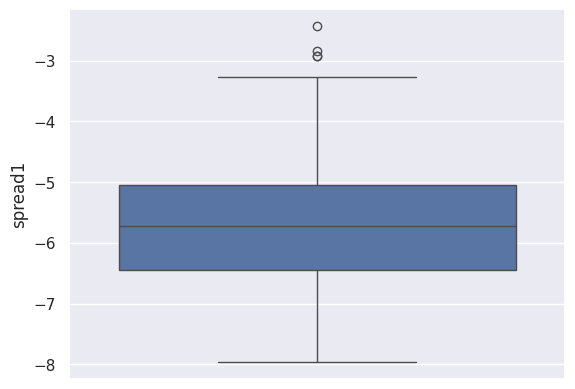

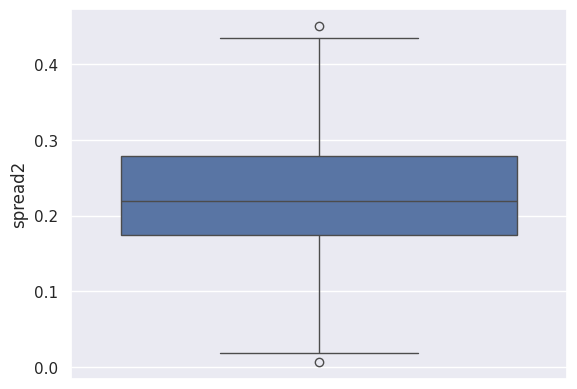

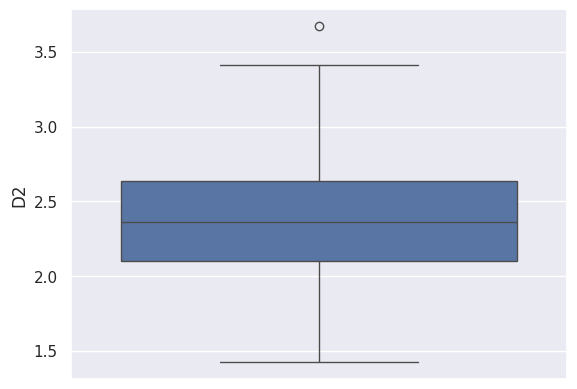

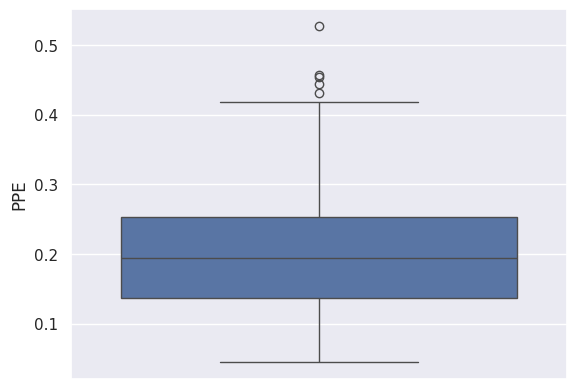

In [ ]:
# outlier

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplots(i)

<Axes: >

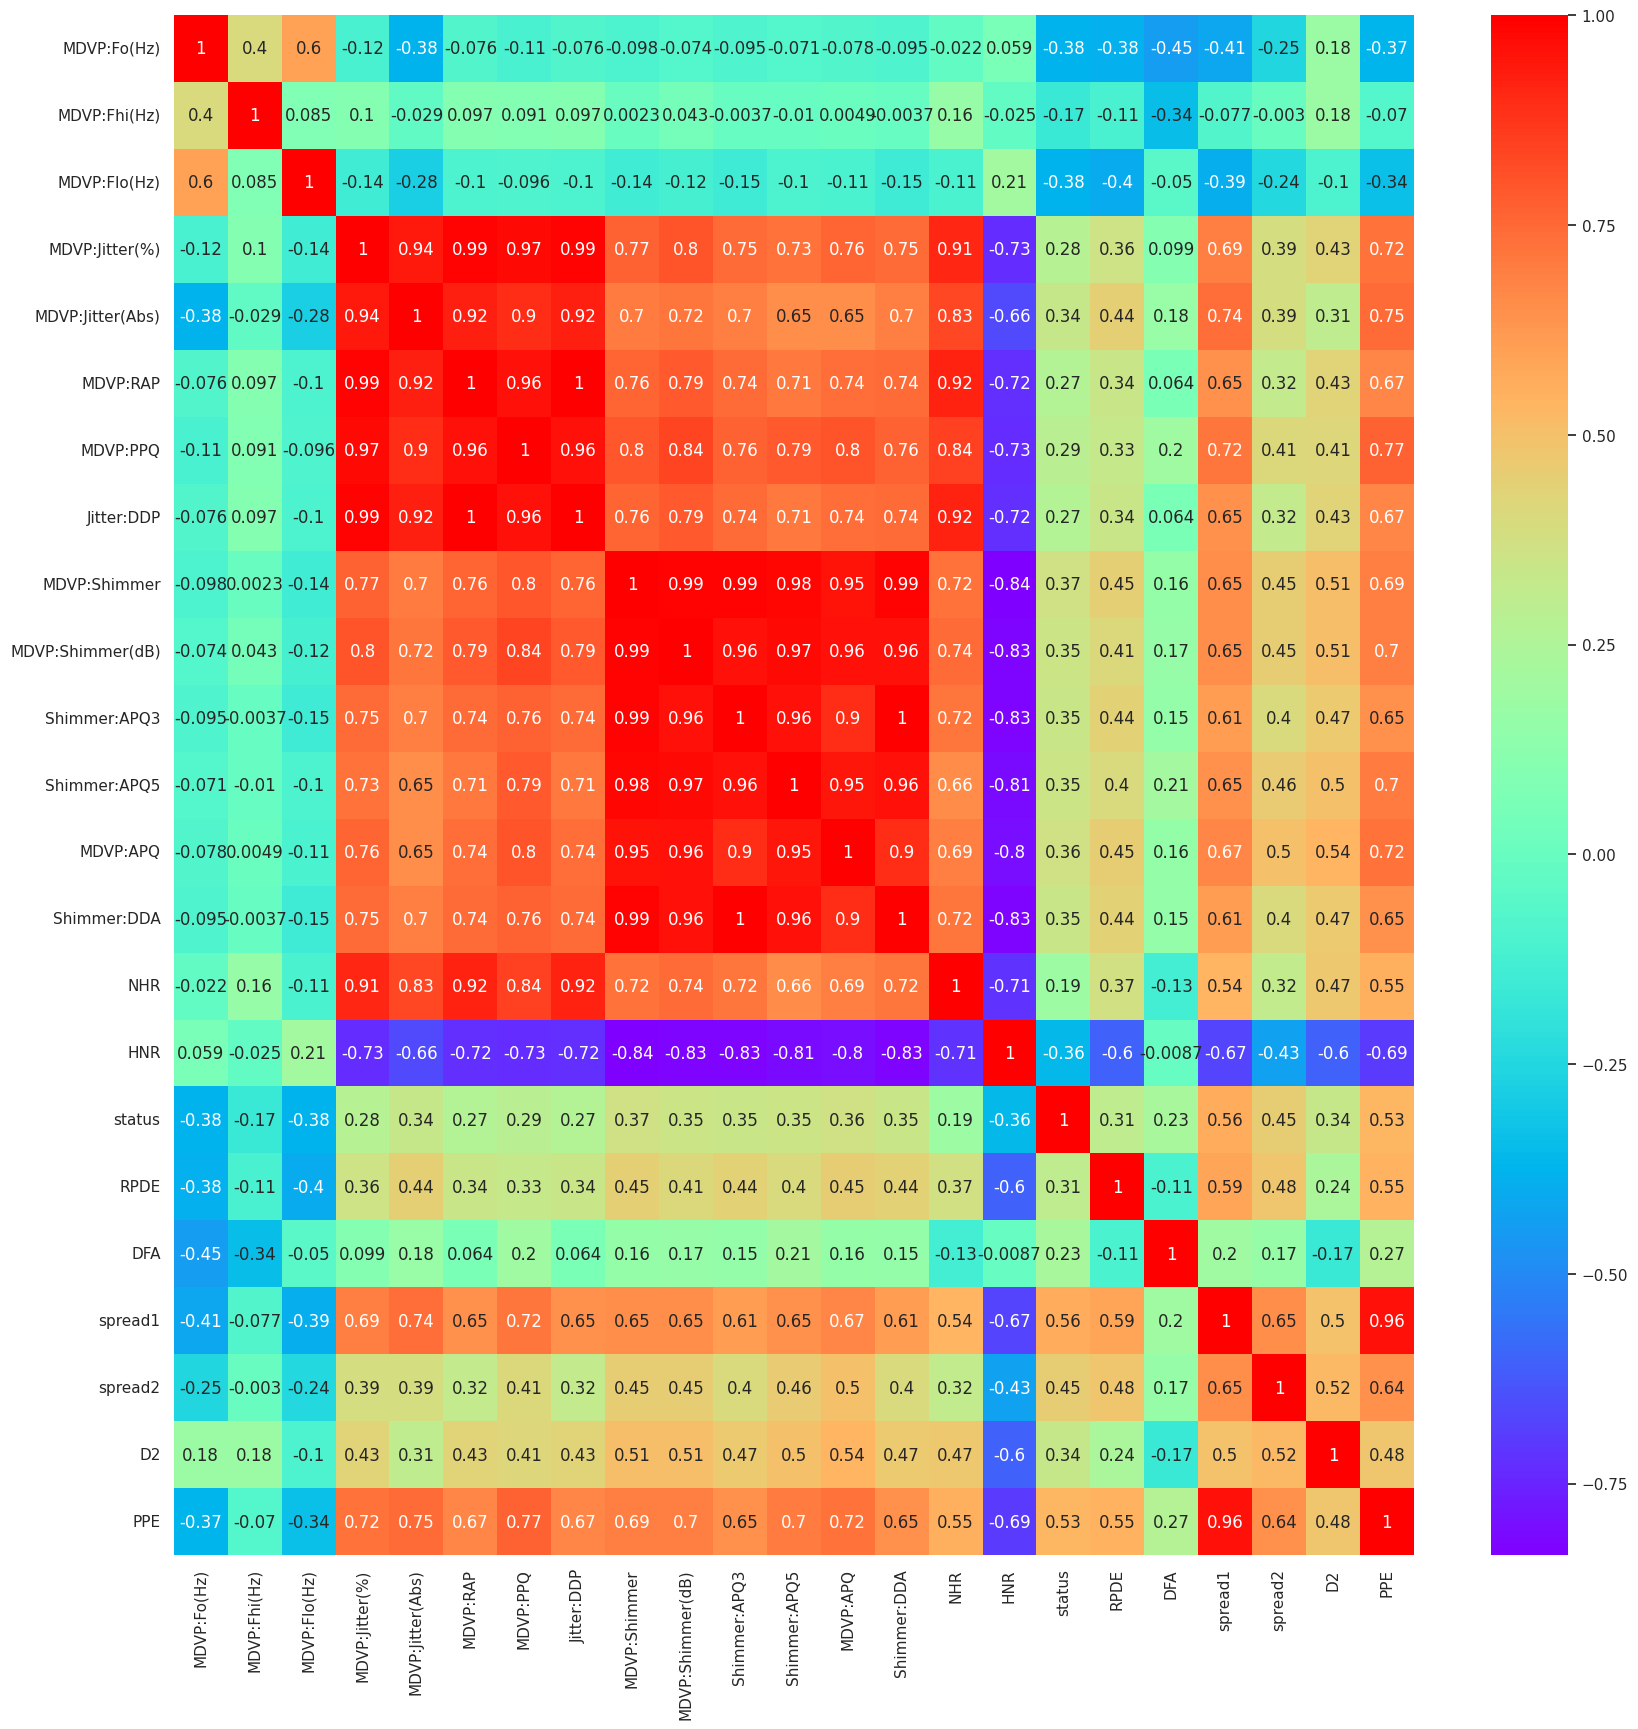

In [ ]:
# Find correlation
plt.figure(figsize=(20,20))
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='rainbow')

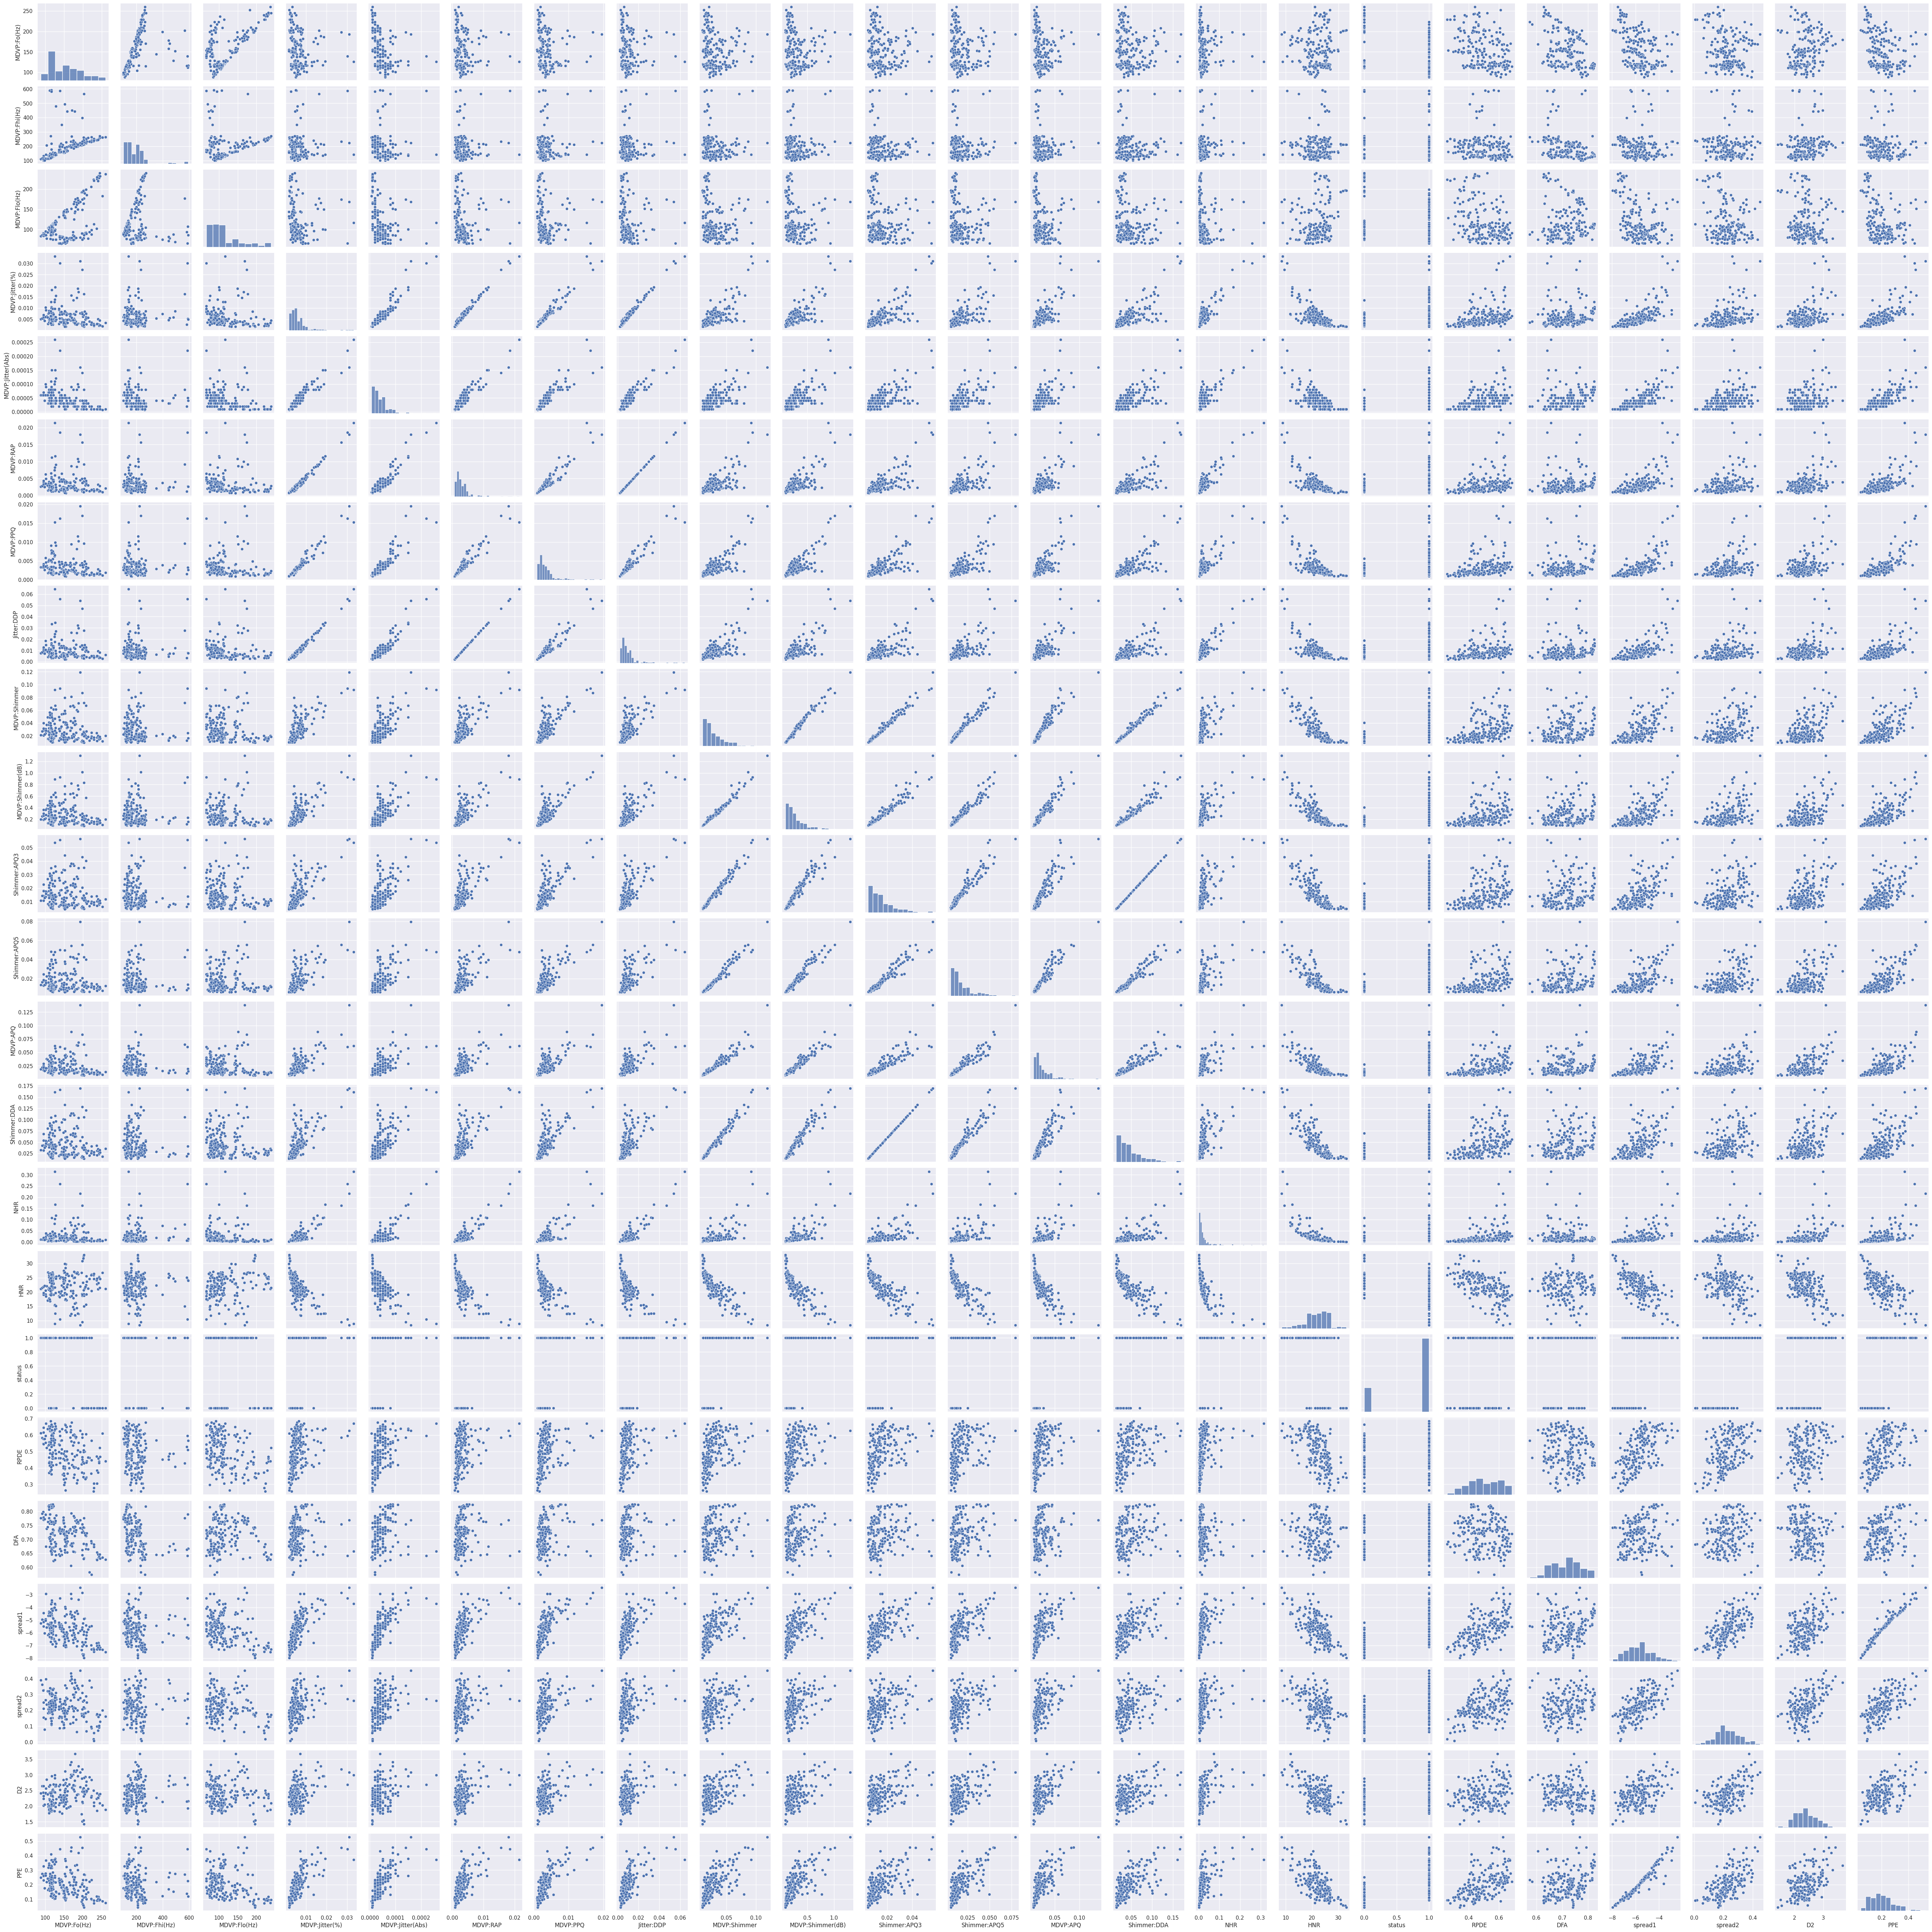

In [ ]:
sns.pairplot(df)

In [ ]:
x = df.drop(['status', 'name'], axis=1)
y = df['status']

In [ ]:
x.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0      119.992       157.302        74.997         0.00784           0.00007   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545   
1      122.400       148.650       113.819         0.00968           0.00008   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368      0.09403   
2      116.682       131.111       111.555         0.01050           0.00009   0.00544   0.00781     0.01633       0.05233             0.482       0.02757       0.03858   0.03590      0.08270   
3      116.676       137.871       111.366         0.00997           0.00009   0.00502   0.00698     0.01505       0.05492             0.517       0.02924       0.04005   0.03772      0.08771   
4      116.014       141.781       110.655         0.01284           0.00011   0.00655   0.00908     0.01966       0.06425             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2       PPE  
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print("############")
print(y_ros.value_counts())

status
1    147
0     48
Name: count, dtype: int64
############
status
1    147
0    147
Name: count, dtype: int64


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

# Preprocessing part completed

In [ ]:
x.shape

(294, 22)

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [ ]:
pd.DataFrame(x_pca)

0         1         2         3         4         5         6         7
0    1.232959 -0.464400 -0.785966  0.462266 -0.227608  0.067600  0.136739 -0.106034
1    2.004482  0.105035 -1.086676  0.021557 -0.387344  0.108783  0.225332 -0.278922
2    1.691245 -0.099469 -1.145464  0.168046 -0.180898 -0.094636  0.099827 -0.133726
3    1.831148 -0.070114 -1.108650  0.096022 -0.331175 -0.068561  0.112836 -0.241223
4    2.218773  0.217495 -1.283347  0.359953  0.044529 -0.034837  0.144020 -0.557415
..        ...       ...       ...       ...       ...       ...       ...       ...
289 -1.454714  1.077764  0.075457 -0.358034  0.041300 -0.042356 -0.105587 -0.217211
290 -1.529179  1.086234  0.085150 -0.403670  0.103166 -0.040642 -0.107354 -0.221168
291 -0.098303 -0.592930 -0.658035  0.080353 -0.144675  0.106837  0.125884  0.319473
292 -1.521665  0.263270 -0.636954  0.042393 -0.224052 -0.092564  0.033209  0.255262
293 -0.003252  0.249251  0.549837  0.466741  0.197510  0.297100  0.119235  0.375501

[294 rows x 8 columns]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1 )

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = 22))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                736       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1825 (7.13 KB)
Trainable params: 1825 (7.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_test, y_test))

Epoch 1/200
8/8 [==============================] - 2s 54ms/step - loss: 0.6727 - accuracy: 0.5106 - val_loss: 0.6635 - val_accuracy: 0.5593
Epoch 2/200
8/8 [==============================] - 0s 12ms/step - loss: 0.6215 - accuracy: 0.6170 - val_loss: 0.6292 - val_accuracy: 0.7288
Epoch 3/200
8/8 [==============================] - 0s 15ms/step - loss: 0.5880 - accuracy: 0.7574 - val_loss: 0.6049 - val_accuracy: 0.7288
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 0.5603 - accuracy: 0.7702 - val_loss: 0.5858 - val_accuracy: 0.6780
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 0.5451 - accuracy: 0.7660 - val_loss: 0.5672 - val_accuracy: 0.6780
Epoch 6/200
8/8 [==============================] - 0s 11ms/step - loss: 0.5177 - accuracy: 0.7660 - val_loss: 0.5487 - val_accuracy: 0.6780
Epoch 7/200
8/8 [==============================] - 0s 13ms/step - loss: 0.4973 - accuracy: 0.7489 - val_loss: 0.5310 - val_accuracy: 0.7119
Epoch 8/200
8/8 [===

# Model Building

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

            Method Used  Accuracy
0   Logistic Regression  0.762712
1         Decision Tree  0.966102
2     RandomForest Gini  1.000000
3  RandomForest Entropy  1.000000
4        Support Vector  0.864407
5   K Nearest Neighbors  0.949153
6            GuassionNB  0.813559
7           BernoulliNB  0.762712
8     Voting Classifier  0.915254
Axes(0.125,0.11;0.775x0.77)


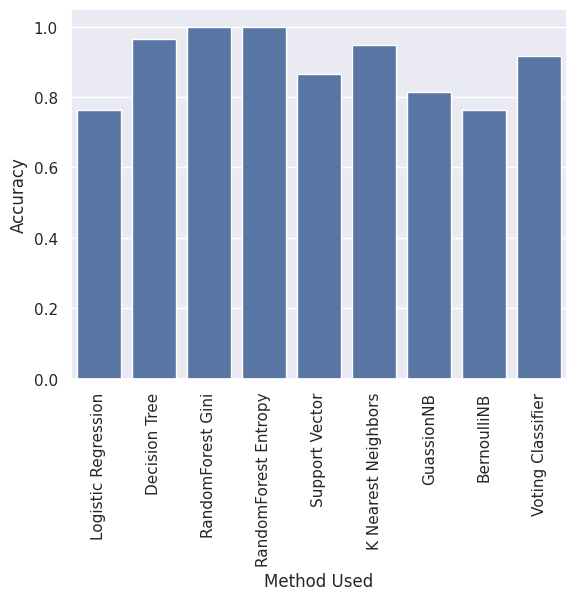

In [ ]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train, y_train)
# Prediction
y_pred = classifier.predict(x_test)
# Accuarcy
accuracy_LR = accuracy_score(y_test, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
# prediction
y_pred2 = classifier2.predict(x_test)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# Model 3
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)
#prediction
y_pred3 = classifier3.predict(x_test)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(x_train, y_train)
# predict
y_pred4 = classifier4.predict(x_test)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(x_train, y_train)
#prediction
y_pred5 = model_svm.predict(x_test)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)
#prediction
pred_knn = model_knn.predict(x_test)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
# prediction
pred_gnb = gnb.predict(x_test)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(x_train, y_train)
# prediction
pred_bnb = bnb.predict(x_test)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(x_train, y_train)
# prediction
pred_evc = evc.predict(x_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)
print(accuracy_score(y_test, y_pred_xgb))

1.0


In [ ]:
# other evaluation method
from sklearn.metrics import roc_curve, auc

In [ ]:
# randomForest entropy

y_pred4_train = classifier4.predict(x_train)
y_pred4_test = classifier4.predict(x_test)

# KNN
pred_knn_train = model_knn.predict(x_train)
pred_knn_test = model_knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_train, y_pred4_train))
print("***************"*5)
print(confusion_matrix(y_test, y_pred4_test))

[[118   0]
 [  0 117]]
***************************************************************************
[[29  0]
 [ 0 30]]


In [ ]:
print(classification_report(y_train, y_pred4_train))
print("***************"*5)
print(classification_report(y_test, y_pred4_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       117

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

***************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [ ]:
print(confusion_matrix(y_train, pred_knn_train))
print("***************"*5)
print(confusion_matrix(y_test, pred_knn_test))

[[118   0]
 [  9 108]]
***************************************************************************
[[29  0]
 [ 3 27]]


In [ ]:
print(classification_report(y_train, pred_knn_train))
print("***************"*5)
print(classification_report(y_test, pred_knn_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       118
           1       1.00      0.92      0.96       117

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235

***************************************************************************
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.90      0.95        30

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# roc and auc

def plot_roc(rfe, x_test, y_test):
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

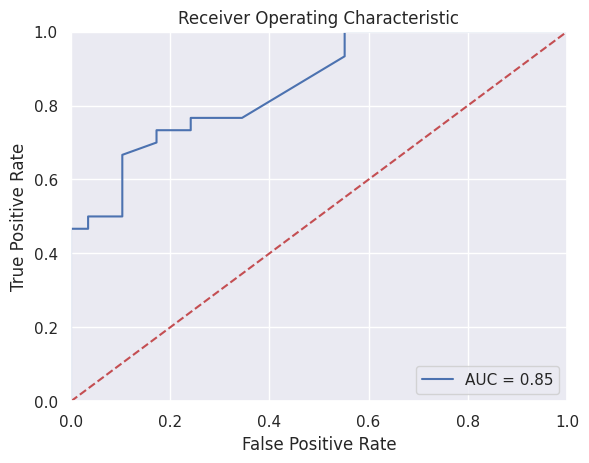

In [ ]:
plot_roc(rfe, x_test, y_test)